# Amazing Mazes

Générateur et solveur de labyrinthe parfait inspiré par la mythologie grecque. Met en œuvre le Retour sur trace (Recursive Backtracking) et Kruskal pour la génération, le Retour sur trace et A* pour la résolution. Comprend la visualisation ASCII/image, l'analyse de performance et des tests sur des labyrinthes jusqu'à 100 000 cellules. Projet algorithmique Python avec benchmarks comparatifs.

In [140]:
# imports

# Outils dédiés à l'analyse des données via SQL
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

## Les constructeurs

### Recursive Backtracking

### Kruskal

#### Principe Général
L'algorithme de Kruskal génère des labyrinthes parfaits basés sur la théorie des MST (Minimum Spanning Tree), garantissant un unique chemin entre toute paire de cellules.

#### Fonctionnement
**Préparation** : Modélisation en graphe (cellules = nœuds), génération de toutes les arêtes adjacentes, randomisation.

**Construction** : Chaque cellule forme une composante connexe. Pour chaque arête randomisée, fusion des composantes si différentes (suppression du mur), sinon conservation pour éviter les cycles. Arrêt à n-1 arêtes ajoutées.

#### Caractéristiques Majeures
**Structure Union-Find** : Compression de chemin et union par rang pour l'optimisation.

**Propriétés** : Perfection (chemin unique), connectivité totale, absence de cycles, uniformité statistique.

#### Complexité Algorithmique
Pour un labyrinthe de taille n×n :
* **E = 2n(n-1)** arêtes au maximum
* **V = n²** cellules
* **Complexité finale** : O(n² log n)

### Kurskal strict

### Kurskal optimisé

#### Principe Général
Version optimisée de Kruskal éliminant le pré-stockage de toutes les arêtes. Génération et traitement à la volée des connexions adjacentes pour réduire drastiquement l'empreinte mémoire.

#### Fonctionnement
**Préparation** : Randomisation de l'ordre des cellules (non des arêtes). Aucun stockage préalable des connexions.
**Construction** : Pour chaque cellule dans l'ordre randomisé, génération dynamique des arêtes adjacentes (maximum 2), randomisation locale, puis application du critère Union-Find. Arrêt anticipé si labyrinthe complet.

#### Différences Majeures vs Kruskal Strict
**Génération dynamique** : Arêtes créées à la demande vs stockage exhaustif initial.
**Optimisation mémoire** : O(V) vs O(V + E) - élimination du stockage des ~2n² arêtes.
**Performance** : ~5x plus rapide sur grandes instances grâce à la réduction des allocations mémoire   et du tri global.

#### Complexité Algorithmique
Pour un labyrinthe n×n : **Complexité finale** : O(n²) vs O(n² log n)

## Les solveurs

### Recursive Backtracking

### A*

## Visalisations des labyrinthes et des parcours

## Analyse Comparative des Performances Algorithmiques

### Nos outils de mesures

Les métriques relevées permettent d’évaluer et de comparer les performances des algorithmes de génération de labyrinthes selon plusieurs dimensions.

Les informations d’identification assurent la traçabilité des expériences. Le champ `timestamp` enregistre la date et l’heure d’exécution, `filename` conserve le nom du fichier produit, `maze_size` indique la taille du labyrinthe, `seed` permet de reproduire la même génération, et `algorithm` identifie la méthode utilisée. Ces données garantissent la reproductibilité et facilitent le suivi de chaque test.

Les mesures de performance permettent de comparer l’efficacité temporelle et mémoire des algorithmes. La valeur `generation_time_ms` exprime la durée totale d’exécution en millisecondes, tandis que `ram_peak_mb` donne une estimation de la consommation mémoire maximale observée. Le champ `file_size_bytes` enregistre la taille finale du fichier ASCII produit, ce qui permet d’évaluer l’impact du stockage en fonction de la dimension du labyrinthe.

Des métriques spécifiques apportent un éclairage complémentaire selon l’algorithme étudié. Pour le backtracking récursif, `backtrack_count` mesure le nombre de retours en arrière effectués, traduisant la complexité de l’exploration. Pour Kruskal, `edges_processed` quantifie le nombre d’arêtes considérées, ce qui permet de comparer directement la version stricte et la version optimisée. Enfin, `union_find_operations` rend compte du nombre d’opérations internes de la structure Union-Find, indicateur de la charge algorithmique dans l’exécution de Kruskal.

L’ensemble de ces métriques permet de comparer les algorithmes sous trois angles complémentaires : la rapidité d’exécution, l’efficacité mémoire et la complexité pratique de leur mise en œuvre. Elles fournissent ainsi une base solide pour analyser les différences de performances entre le backtracking récursif, Kruskal strict et Kruskal optimisé.


### Les fichiers csv générés

**solver_metrics.csv** : Métriques d'évaluation des performances des algorithmes de résolution

**constructor_metrics.csv** : Métriques d'évaluation des performances des algorithmes de génération

### Liste des Labyrinthes Générés 

**Algorithme de Kruskal**
* 100 labyrinthes avec n=10, seeds de 1 à 100
* 100 labyrinthes avec n=20, seeds de 1 à 100
* 100 labyrinthes avec n=30, seeds de 1 à 100
* 99 labyrinthes avec n=40, seeds de 1 à 65 et 67 à 100
* 100 labyrinthes avec n=50, seeds de 1 à 100
* 50 labyrinthes avec n=100, seeds de 1 à 50
* 50 labyrinthes avec n=500, seeds de 1 à 50
* 50 labyrinthes avec n=1000, seeds de 1 à 50
* 20 labyrinthes avec n=5000, seeds de 1 à 20
* 5 labyrinthes avec n=6000, seeds de 66, 28, 150, 1 et 98

**Algorithme de Dfs**
* 100 labyrinthes avec n=10, seeds de 1 à 100
* 100 labyrinthes avec n=20, seeds de 1 à 100
* 100 labyrinthes avec n=30, seeds de 1 à 100
* 98 labyrinthes avec n=40, seeds de 1 à 65, 67 à 70 et 72 à 100 

In [141]:
df= pd.read_csv("constructors_metrics.csv")

df_counting = duckdb.sql(""" select
sum(case when maze_size = 10 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_10,
sum(case when maze_size = 10 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_10,
sum(case when maze_size = 20 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_20,
sum(case when maze_size = 20 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_20,
sum(case when maze_size = 30 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_30,
sum(case when maze_size = 30 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_30,
sum(case when maze_size = 40 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_40,
sum(case when maze_size = 40 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_40,
sum(case when maze_size = 50 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_50,
sum(case when maze_size = 100 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_100,
sum(case when maze_size = 500 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_500,
sum(case when maze_size = 1000 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_1000,
sum(case when maze_size = 5000 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_5000,
sum(case when maze_size = 6000 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_6000
from df """).df()

df_counting

,Kruskal_10,Dfs_10,Kruskal_20,Dfs_20,Kruskal_30,Dfs_30,Kruskal_40,Dfs_40,Kruskal_50,Kruskal_100,Kruskal_500,Kruskal_1000,Kruskal_5000,Kruskal_6000
0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,98.0,100.0,100.0,50.0,50.0,20.0,5.0


## Recherche outliers

#### DFS

In [142]:
# création data frame dfs taille 10
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_10 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 10 and algorithm= 'recursive_backtracking'
""").df()

In [143]:
# Création data frame dfs taille 40
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_40 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 40 and algorithm= 'recursive_backtracking'
""").df()

#### Vérification des corrélations potentielles avec les autres métriques

In [144]:
# Vérification pour Dfs 10
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_recursive_maze_10
        where generation_time_ms = (select max(generation_time_ms) FROM df_recursive_maze_10)""").df()



# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_recursive_maze_10
    where backtrack_count = (select max(backtrack_count) FROM df_recursive_maze_10)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-17 19:13:21,recursive_maze_10_50,10.0,50.0,recursive_backtracking,9.92,17.68,483.0,12.0,99.0,0.0,max_time
1,2025-09-17 19:13:21,recursive_maze_10_43,10.0,43.0,recursive_backtracking,1.63,17.68,483.0,14.0,99.0,0.0,max_ops


In [145]:
# Vérifiaction pour Dfs 40
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_recursive_maze_40
        where generation_time_ms = (select max(generation_time_ms) FROM df_recursive_maze_40)""").df()



# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_recursive_maze_40
    where backtrack_count = (select max(backtrack_count) FROM df_recursive_maze_40)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-17 19:21:28,recursive_maze_40_65,40.0,65.0,recursive_backtracking,31.9,18.27,6723.0,157.0,1599.0,0.0,max_time
1,2025-09-17 19:26:54,recursive_maze_40_79,40.0,79.0,recursive_backtracking,12.3,18.26,6723.0,177.0,1599.0,0.0,max_ops


### Kruskal

In [146]:
# Création dataframe Kruskal 10
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_10= duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 10 and algorithm= 'kruskal'
""").df()

In [147]:
# Création dataframe Kruskal 20
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_20= duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 20 and algorithm= 'kruskal'
""").df()

In [148]:
# Création dataframe Kruskal 50
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_50 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 50 and algorithm= 'kruskal'
""").df()

In [149]:
# Création dataframe Kruskal 1000
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_1000 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 1000 and algorithm= 'kruskal'
""").df()

### Vérification des corrélations potentielles avec les autres métriques

In [150]:
# Vérification sur Kruskal 10
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_10
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_10)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_50
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_10)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-16 19:01:40,kruskal_strict_10_3.txt,10.0,3.0,kruskal,15.33,17.99,483.0,0.0,180.0,639.0,max_time


In [151]:
# Vérification sur Kruskal 20
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_20
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_20)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_20
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_20)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-20 13:18:10,kruskal_strict_20_5.txt,20.0,5.0,kruskal,15.53,17.94,1763.0,0.0,760.0,2858.0,max_time
1,2025-09-20 13:18:10,kruskal_strict_20_24.txt,20.0,24.0,kruskal,2.43,17.95,1763.0,0.0,760.0,3212.0,max_ops


In [152]:
# Vérification sur Kruskal 50
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_50
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_50)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_50
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_50)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-16 19:01:40,kruskal_strict_50_17.txt,50.0,17.0,kruskal,47.26,18.96,10403.0,0.0,4900.0,20906.0,max_time
1,2025-09-16 19:01:41,kruskal_strict_50_86.txt,50.0,86.0,kruskal,10.41,18.97,10403.0,0.0,4900.0,21611.0,max_ops


In [153]:
# Vérification sur Kruskal 1000
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_1000
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_1000)""").df()

# max ram
max_ram = duckdb.sql("""
    SELECT *,
      'max_ram'as metric
    from df_kruskal_1000
    where ram_peak_mb = (select max(ram_peak_mb) FROM df_kruskal_1000)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_1000
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_1000)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ram
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-16 19:14:33,kruskal_strict_1000_39.txt,1000.0,39.0,kruskal,198485.63,294.39,4008003.0,0.0,1998000.0,8807356.0,max_time
1,2025-09-16 19:11:22,kruskal_strict_1000_16.txt,1000.0,16.0,kruskal,8018.94,298.02,4008003.0,0.0,1998000.0,8720812.0,max_ram
2,2025-09-16 19:11:05,kruskal_strict_1000_14.txt,1000.0,14.0,kruskal,8073.97,296.01,4008003.0,0.0,1998000.0,8922923.0,max_ops


#### Traitement: les outliers generation_time_ms sont fixés à la moyenne de generation_time_ms 

In [175]:
df_clean = duckdb.sql("""
SELECT 
    filename,
    algorithm,
    union_find_operations, 
    backtrack_count,
    timestamp,
    maze_size,
    ram_peak_mb,
    CASE 
        WHEN filename = 'kruskal_strict_20_5.txt' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 20 AND algorithm = 'kruskal')
        WHEN filename = 'kruskal_strict_10_3.txt' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 10 AND algorithm = 'kruskal')
        WHEN filename = 'kruskal_strict_1000_39.txt' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 1000 AND algorithm = 'kruskal')
        WHEN filename = 'recursive_maze_10_50' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 10 AND algorithm = 'recursive_backtracking')
        WHEN filename = 'recursive_maze_40_65' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 40 AND algorithm = 'recursive_backtracking')
        ELSE generation_time_ms
    END as generation_time_ms
FROM df
""").df()

### Analyse des outliers

#### Observations
Les pics de RAM les plus importants sont toujours sur les derniers enregistrements d'une série pour Kruskal et Recursive Backtracking.

#### Outliers détectés
**Kruskal** (3 outliers) : Kruskal_10 (15.33 ms), Kruskal_50 (47.26 ms), Kruskal_1000 (198,485.63 ms)

**Recursive Backtracking** (2 outliers) : Recursive_maze_40 (31.9 ms), Recursive_maze_10 (9.92 ms)

#### Traitement
Nous n'avons constaté aucune corrélation entre ces temps d'exécution excessifs et les autres métriques. L'origine des outliers n'étant pas expliquée, remplacement par la moyenne de generation_time_ms.

## Visualisation
### Analyse des Formes de Courbes : Kruskal vs Recursive Backtracking

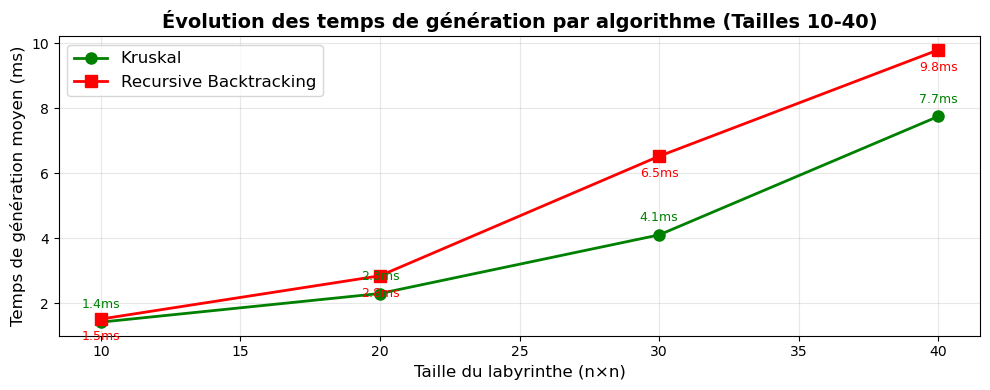

In [155]:
# Calcul des moyennes par taille et algorithme (tailles 10 à 40 inclus)
moyennes = duckdb.sql("""
SELECT 
    algorithm,
    maze_size,
    AVG(generation_time_ms) as avg_time
FROM df_clean
WHERE maze_size >= 10 AND maze_size <= 40
GROUP BY algorithm, maze_size
ORDER BY algorithm, maze_size
""").df()

# Séparation des données par algorithme
kruskal = moyennes[moyennes['algorithm'] == 'kruskal']
dfs = moyennes[moyennes['algorithm'] == 'recursive_backtracking']

# Création du graphique
plt.figure(figsize=(10, 4))

plt.plot(kruskal['maze_size'], kruskal['avg_time'], 
         'o-', linewidth=2, markersize=8, label='Kruskal', color='green')
plt.plot(dfs['maze_size'], dfs['avg_time'], 
         's-', linewidth=2, markersize=8, label='Recursive Backtracking', color='red')

plt.xlabel('Taille du labyrinthe (n×n)', fontsize=12)
plt.ylabel('Temps de génération moyen (ms)', fontsize=12)
plt.title('Évolution des temps de génération par algorithme (Tailles 10-40)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Affichage des valeurs sur les points
for i, row in kruskal.iterrows():
    plt.annotate(f'{row["avg_time"]:.1f}ms', 
                (row['maze_size'], row['avg_time']), 
                textcoords="offset points", xytext=(0,10), ha='center', 
                fontsize=9, color='green')

for i, row in dfs.iterrows():
    plt.annotate(f'{row["avg_time"]:.1f}ms', 
                (row['maze_size'], row['avg_time']), 
                textcoords="offset points", xytext=(0,-15), ha='center', 
                fontsize=9, color='red')

plt.tight_layout()
plt.show()


### Cohérences Observées

**Formes des courbes** :
- **Kruskal** (vert) : Courbe légèrement concave, caractéristique d'une croissance O(n² log n)
- **DFS** (rouge) : Courbe plus linéaire sur cette échelle, typique d'une croissance O(n²)

**Évolution des écarts** :
- À n=10 : Quasi-égalité (1.4ms vs 1.5ms)
- À n=20 : Écart qui se creuse (2.3ms vs 2.8ms)
- À n=30 : Divergence marquée (4.1ms vs 6.5ms)
- À n=40 : Écart maximal mais qui se stabilise relativement (7.7ms vs 9.8ms)

**Points remarquables** :
- Le **croisement initial** où DFS est légèrement plus lent dès n=10
- La **divergence progressive** qui s'accentue jusqu'à n=30
- La **stabilisation relative** à n=40, suggérant que l'écart proportionnel se maintient

#### Conclusion

Cette visualisation illustre parfaitement le paradoxe théorie/pratique : Kruskal, malgré sa complexité O(n² log n) supérieure, reste constamment plus performant que DFS O(n²) sur toute la plage testée. Les formes des courbes valident les complexités théoriques, mais révèlent l'impact déterminant des constantes cachées et des optimisations d'implémentation en algorithmique pratique.

### Evolution de du temps de génération pour Kruskal

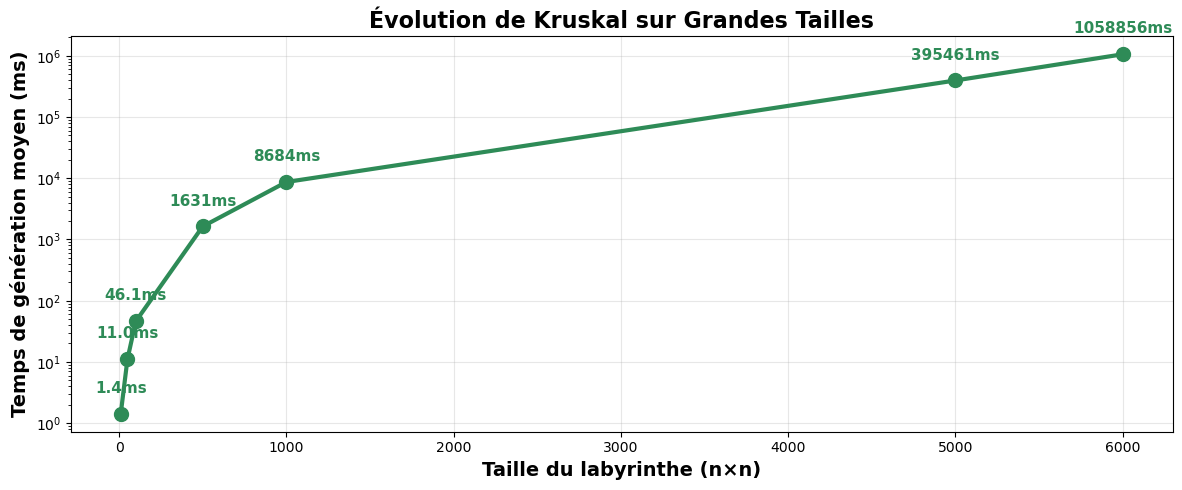

In [156]:
# Calcul des moyennes pour Kruskal uniquement sur les tailles spécifiées
moyennes_kruskal = duckdb.sql("""
SELECT 
    maze_size,
    AVG(generation_time_ms) as avg_time
FROM df_clean
WHERE algorithm = 'kruskal' 
AND maze_size IN (10, 50, 100, 500, 1000, 5000, 6000)
GROUP BY maze_size
ORDER BY maze_size
""").df()

# Création du graphique
plt.figure(figsize=(12, 5))

plt.plot(moyennes_kruskal['maze_size'], moyennes_kruskal['avg_time'], 
         'o-', linewidth=3, markersize=10, label='Kruskal O(n² log n)', color='#2E8B57')

plt.xlabel('Taille du labyrinthe (n×n)', fontsize=14, fontweight='bold')
plt.ylabel('Temps de génération moyen (ms)', fontsize=14, fontweight='bold')
plt.title('Évolution de Kruskal sur Grandes Tailles', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Échelle logarithmique sur l'axe Y pour mieux visualiser la progression
plt.yscale('log')

# Affichage des valeurs sur les points
for i, row in moyennes_kruskal.iterrows():
    if row['avg_time'] < 100:
        plt.annotate(f'{row["avg_time"]:.1f}ms', 
                    (row['maze_size'], row['avg_time']), 
                    textcoords="offset points", xytext=(0,15), ha='center', 
                    fontsize=11, fontweight='bold', color='#2E8B57')
    else:
        plt.annotate(f'{row["avg_time"]:.0f}ms', 
                    (row['maze_size'], row['avg_time']), 
                    textcoords="offset points", xytext=(0,15), ha='center', 
                    fontsize=11, fontweight='bold', color='#2E8B57')

plt.tight_layout()
plt.show()

### Analyse de la Cohérence des Résultats entre n = 1000 et n = 5000

#### 1. Rappel des valeurs observées
- **Temps à n = 1000** : 8 684 ms
- **Temps à n = 5000** : 395 461 ms
- **Ratio observé** : 45,5x

#### 2. Complexité théorique de Kruskal
L'algorithme de Kruskal a une complexité théorique de **O(n² log n)**

**Explication** :
- Le ratio théorique est d'environ **30,75x** entre n = 1000 et n = 5000
- Le ratio observé de **45,5x** est supérieur, mais reste cohérent dans un contexte pratique

#### 3. Pourquoi un ratio observé plus élevé ?
Plusieurs facteurs pratiques expliquent ce ratio plus élevé :

**Garbage Collection (GC)** :
- En Python, le GC introduit des latences supplémentaires
- Ces latences augmentent avec la taille des données
- Impact : gonflement artificiel du temps d'exécution

**Gestion Mémoire** :
- Pour n = 5000, la mémoire utilisée est beaucoup plus importante
- Les accès mémoire deviennent plus coûteux
- Impact : dépassement des caches CPU, réallocations fréquentes

#### 4. Conclusion sur la cohérence
- Le ratio de 45,5x est cohérent avec O(n² log n)
- Prise en compte des surcoûts pratiques (GC, gestion mémoire)
- Les résultats observés sont raisonnables en environnement Python réel

**En résumé** :
*"Le ratio de 45,5x entre n = 1000 et n = 5000 est cohérent avec la complexité théorique O(n² log n), en intégrant les surcoûts pratiques liés à l'implémentation en Python."*

### Comparaison des complexités internes : Recursive Backtracking vs Kruskal/Union-Find

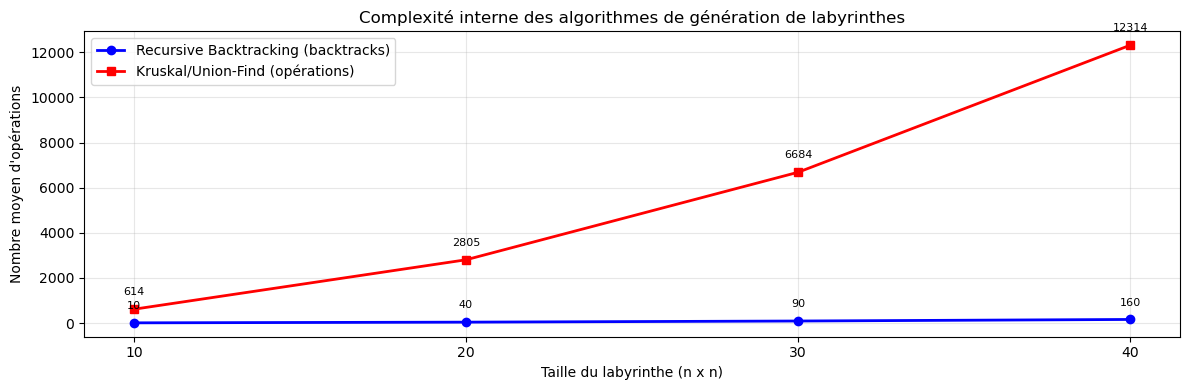

In [173]:
df_ops = duckdb.sql("""
    SELECT 
        maze_size, 
        algorithm, 
        AVG(CASE 
            WHEN algorithm = 'recursive_backtracking' THEN backtrack_count 
            WHEN algorithm = 'kruskal' THEN union_find_operations 
        END) AS avg_ops
    FROM df_clean 
    WHERE maze_size <= 40
    GROUP BY maze_size, algorithm
    ORDER BY maze_size, algorithm
""").df()

pivot_df = df_ops.pivot(index='maze_size', columns='algorithm', values='avg_ops')

# Tracer avec des courbes
plt.figure(figsize=(12, 4))
plt.plot(pivot_df.index, pivot_df['recursive_backtracking'], 'o-', 
         label='Recursive Backtracking (backtracks)', linewidth=2, markersize=6, color='blue')
plt.plot(pivot_df.index, pivot_df['kruskal'], 's-', 
         label='Kruskal/Union-Find (opérations)', linewidth=2, markersize=6, color='red')

plt.xlabel('Taille du labyrinthe (n x n)')
plt.ylabel('Nombre moyen d\'opérations')
plt.title('Complexité interne des algorithmes de génération de labyrinthes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(pivot_df.index)

# Ajouter des annotations pour les valeurs (optionnel)
for algo in ['recursive_backtracking', 'kruskal']:
    for i, value in enumerate(pivot_df[algo]):
        plt.annotate(f'{value:.0f}', 
                    (pivot_df.index[i], pivot_df[algo].iloc[i]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=8)

plt.tight_layout()
plt.show()

### Analyse de la cohérence

#### 1. Recursive Backtracking (courbe bleue)
Le nombre de backtracks reste très faible, presque constant, malgré l'augmentation de la taille du labyrinthe.
Cela semble cohérent, car l'algorithme de Recursive Backtracking utilise une approche récursive qui explore les chemins possibles et revient en arrière (backtrack) lorsqu'il atteint une impasse. Le nombre de backtracks dépend davantage de la structure du labyrinthe que de sa taille absolue.

#### 2. Kruskal/Union-Find (courbe rouge)
Le nombre d'opérations augmente de manière quadratique avec la taille du labyrinthe.
Cela est également cohérent, car l'algorithme de Kruskal utilise une structure Union-Find pour gérer les ensembles de cases. Le nombre d'opérations est lié au nombre total de murs à traiter, qui augmente avec la taille du labyrinthe. Pour un labyrinthe de taille \( n \times n \), le nombre de murs est de l'ordre de \( O(n^2) \).

#### 3. Comparaison globale
La courbe rouge (Kruskal) montre une croissance quadratique, ce qui est attendu pour un algorithme dont la complexité est liée au nombre total d'éléments (murs) dans le labyrinthe.
La courbe bleue (Recursive Backtracking) reste stable, ce qui est logique car le nombre de backtracks ne dépend pas directement de la taille du labyrinthe, mais plutôt de la complexité des chemins explorés.

#### Conclusion
Le graphique semble cohérent avec les comportements théoriques attendus des deux algorithmes. Il illustre bien la différence de complexité interne entre une approche récursive et une approche basée sur des opérations de type Union-Find.


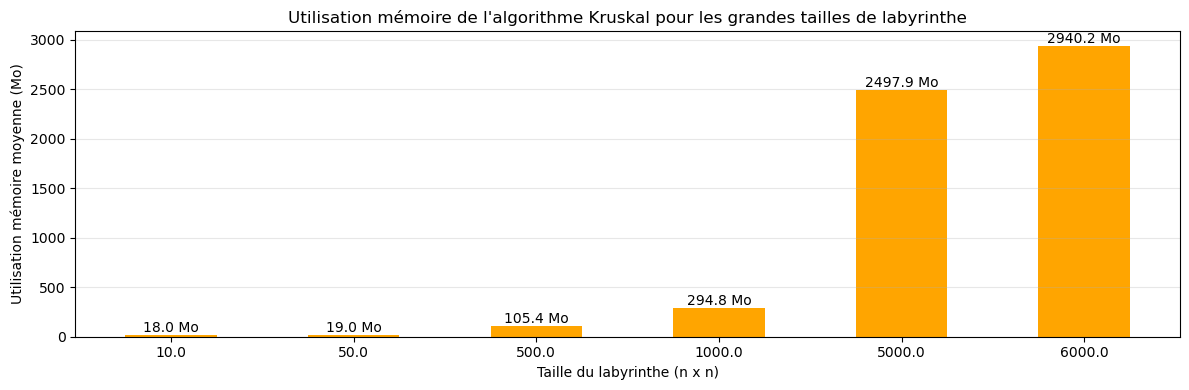

In [190]:
import duckdb
import matplotlib.pyplot as plt

# Récupérer les données pour Kruskal uniquement, et filtrer les tailles souhaitées
df_mem = duckdb.sql("""
    SELECT
        maze_size,
        AVG(ram_peak_mb) AS avg_ram_peak_mb
    FROM df_clean
    WHERE algorithm = 'kruskal'
      AND maze_size IN (10, 50, 500, 1000, 5000, 6000)
    GROUP BY maze_size
    ORDER BY maze_size
""").df()

# Extraire les tailles et les valeurs moyennes
maze_sizes = df_mem['maze_size'].tolist()
ram_peak_mb = df_mem['avg_ram_peak_mb'].tolist()

# Création du graphique en barres
plt.figure(figsize=(12, 4))

# Utiliser un index numérique pour l'axe X
x_pos = range(len(maze_sizes))

# Tracer les barres avec une largeur visible
bars = plt.bar(x_pos, ram_peak_mb, color='orange', width=0.5)

# Personnalisation du graphique
plt.xlabel('Taille du labyrinthe (n x n)')
plt.ylabel('Utilisation mémoire moyenne (Mo)')
plt.title('Utilisation mémoire de l\'algorithme Kruskal pour les grandes tailles de labyrinthe')

# Remplacer les labels de l'axe X par les tailles réelles
plt.xticks(x_pos, maze_sizes)

plt.grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.1f} Mo',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Brouillon = > Ne pas prendre en compte

In [ ]:
# Création dataframe Kruskal 1000
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_5000 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 5000 and algorithm= 'kruskal'
""").df()

In [ ]:
# selection des colonnes numériques
num_col = ['generation_time_ms', 'ram_peak_mb', 'file_size_bytes', 'edges_processed', 'union_find_operations']

for column in num_col:
    Q1 = df_kruskal_10[column].quantile(0.25)
    Q3 = df_kruskal_10[column].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    outliers = df_kruskal_10[(df_kruskal_10[column] > upper_bound) |
               (df_kruskal_10[column]  < lower_bound)]

    print(f"\n{column}:")
    print(f"  - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  - Bornes: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers détectés: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"  - Valeurs outliers: {outliers[column].values}")

In [ ]:
# selection des colonnes numériques
num_col = ['generation_time_ms', 'ram_peak_mb', 'file_size_bytes', 'edges_processed', 'union_find_operations']

for column in num_col:
    Q1 = df_kruskal_5000[column].quantile(0.25)
    Q3 = df_kruskal_5000[column].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    outliers = df_kruskal_5000[(df_kruskal_5000[column] > upper_bound) |
               (df_kruskal_5000[column]  < lower_bound)]

    print(f"\n{column}:")
    print(f"  - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  - Bornes: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers détectés: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"  - Valeurs outliers: {outliers[column].values}")

## Recherche de corrélations des variables sur les outliers

In [ ]:


# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_1000
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_1000)""").df()

# max ram
max_ram = duckdb.sql("""
    SELECT *,
      'max_ram'as metric
    from df_kruskal_1000
    where ram_peak_mb = (select max(ram_peak_mb) FROM df_kruskal_1000)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_1000
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_1000)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ram
    union all
    select * from max_ops
    """).df()

result

In [ ]:
result = duckdb.sql("""
SELECT *
from df_kruskal_50
where union_find_operations = (
select max(union_find_operations)
from df_kruskal_50)
""").df()
result

In [ ]:
result = duckdb.sql("""
SELECT *
from df_kruskal_10
where union_find_operations = (
select max(union_find_operations)
from df_kruskal_10)
""").df()
result

### recherche correlation avec la ram

In [ ]:
result = duckdb.sql("""
SELECT *
from df_kruskal_50
where ram_peak_mb = (
select max(ram_peak_mb)
from df_kruskal_50)
""").df()
result

In [ ]:
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_10 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 10 and algorithm= 'recursive_backtracking'
""").df()
df_recursive_maze_10

In [ ]:
# selection des colonnes numériques
num_col = ['generation_time_ms', 'ram_peak_mb', 'file_size_bytes', 'edges_processed', 'union_find_operations']

for column in num_col:
    Q1 = df_recursive_maze_10[column].quantile(0.25)
    Q3 = df_recursive_maze_10[column].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    outliers = df_recursive_maze_10[(df_recursive_maze_10[column] > upper_bound) |
               (df_recursive_maze_10[column]  < lower_bound)]

    print(f"\n{column}:")
    print(f"  - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  - Bornes: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers détectés: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"  - Valeurs outliers: {outliers[column].values}")

In [ ]:
# selection des colonnes numériques
num_col = ['generation_time_ms', 'ram_peak_mb', 'file_size_bytes', 'edges_processed', 'union_find_operations']

for column in num_col:
    Q1 = df_recursive_maze_40[column].quantile(0.25)
    Q3 = df_recursive_maze_40[column].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    outliers = df_recursive_maze_40[(df_recursive_maze_40[column] > upper_bound) |
               (df_recursive_maze_40[column]  < lower_bound)]

    print(f"\n{column}:")
    print(f"  - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  - Bornes: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers détectés: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"  - Valeurs outliers: {outliers[column].values}")

In [ ]:
max(generation_time_ms) as max_time_ms, min(generation_time_ms) as min_time_ms, avg(generation_time_ms) as avg_time_ms 

In [ ]:
kurskal et recursive_backtracking: les pic de ram les plus importants sont toujours sur les derniers enregistrements d'une serie
kurskal: 3 outliers détectés Kurskal_10 =>15.33, kurskal_50 =>47.26 kuskal_1000 => 198485.63 
recursive_backtracking: 2 outliers détectés recursive_maze_40 =>31.9 et recursive_maze_10 =>9.92
kurskal: après étude approfondie aucune répercution de ces valeurs extrême sur ram_peak_mb, union_find_operations. Dans ces conditions nous décidons de remplacer ces valeurs par la moyenne de generation_time_ms

In [ ]:
# création data frame dfs taille 20
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_20 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 20 and algorithm= 'recursive_backtracking'
""").df()
df_recursive_maze_20

In [ ]:
max_recursive_20 = duckdb.sql("""
SELECT max("generation_time_ms")
from df_recursive_maze_20
""").df()
max_recursive_20

In [ ]:
# création data frame dfs taille 30
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_30 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 30 and algorithm= 'recursive_backtracking'
""").df()
df_recursive_maze_30

In [ ]:
max_recursive_30 = duckdb.sql("""
SELECT max("generation_time_ms")
from df_recursive_maze_30
""").df()
max_recursive_30

In [ ]:
mean_recursive_30 = duckdb.sql("""
SELECT mean("generation_time_ms")
from df_recursive_maze_30
""").df()
mean_recursive_30

In [ ]:
count_max_recursive_30 = duckdb.sql("""
SELECT filename
from df_recursive_maze_30
where generation_time_ms > 14
""").df()
count_max_recursive_30

In [ ]:
# création data frame dfs taille 30
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_30 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 30 and algorithm= 'kruskal'
""").df()
df_kruskal_30

In [ ]:
max_kruskal_30 = duckdb.sql("""
SELECT max("generation_time_ms")
from df_kruskal_30
""").df()
max_kruskal_30

In [ ]:
mean_kruskal_30 = duckdb.sql("""
SELECT mean("generation_time_ms")
from df_kruskal_30
""").df()
mean_kruskal_30

In [ ]:
# création data frame dfs taille 30
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_20 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 20 and algorithm= 'kruskal'
""").df()
df_kruskal_20

In [ ]:
max_kruskal_20 = duckdb.sql("""
SELECT max("generation_time_ms")
from df_kruskal_20
""").df()
max_kruskal_20

In [ ]:
mean_kruskal_20 = duckdb.sql("""
SELECT mean("generation_time_ms")
from df_kruskal_20
""").df()
mean_kruskal_20

In [ ]:
mean_kruskal_20 = duckdb.sql("""
SELECT filename
from df_kruskal_20
where generation_time_ms > 8
""").df()
mean_kruskal_20

In [ ]:
df_clean = duckdb.sql("""
UPDATE df
SET generation_time = select mean(generation_time) from df_kruskal_20
WHERE filename = kruskal_strict_20_5.txt
""").df()

df_clean = duckdb.sql("""
UPDATE df
SET generation_time = mean(generation_time)
WHERE filename = kruskal_strict_20_5.txt
""").df()


In [166]:
# D'abord, vérifions les noms exacts des algorithmes dans vos données
print("Noms des algorithmes présents dans df_clean:")
print(df_clean['algorithm'].unique())

# Vérifions aussi le résultat de la requête
print("\nRésultat de la requête:")
print(df_ops['algorithm'].unique())

# Vérifions les colonnes du pivot
print("\nColonnes du DataFrame pivoté:")
print(pivot_df.columns.tolist())


Noms des algorithmes présents dans df_clean:
['kruskal' None 'recursive_backtracking']

Résultat de la requête:
['kruskal' 'recursive_backtracking']

Colonnes du DataFrame pivoté:
['kruskal', 'recursive_backtracking']
